# Predicting future closing price of stocks using linear regression models 

## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from IPython.display import clear_output
import timeit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Exploring the data

In [2]:
# Read in the data
stock = pd.read_csv('sphist.csv')

# Converting Date column into a datetime object for easy date comparison
stock['Date'] = pd.to_datetime(stock['Date'])
stock = stock.sort_values(by = 'Date')

# A look at the first few elements
stock.head(15)

,Date,Open,High,Low,Close,Volume,Adj Close
16589,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000
16588,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000
16587,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000
16586,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000
16585,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000
16584,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001
16583,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000
16582,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000
16581,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000
16580,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999


## Feature creation

A feature that would be useful to use in the model is the mean of the previous closing prices.
We will create a function that does this for any number of days before and on any column in the data.

In [3]:
def day_avg(n, col = 'Close'):
    day_avg_col = []
    
    # Initalize the timer function
    start = timeit.default_timer()

    for index, row in stock.iterrows():
        clear_output(wait = True)
        
        # Selecting the previous n elements and calculating the mean for the selected column
        day_vals = stock.loc[index + n: index,:][col]            
        day_avg = day_vals[:n].mean()
        day_avg_col.append(day_avg)

        stop = timeit.default_timer()
    
        # Calculating the progress of the function and expected 
        if ((len(stock) - index)/len(stock)*100) < 5:
            expected_time = 'Calculating...'
        else:
            time_perc = timeit.default_timer()
            expected_time = np.round(((time_perc - start) / 
                                      ((len(stock) - index)/len(stock)))/60,2)
        
        print('Current progress:', np.round((len(stock)-index)/len(stock) *100, 2),'%')
        print('Current run time:', np.round((stop - start)/60,2), 'minutes')
        print('Epected Run Time:', expected_time,'minutes')
    
    # Assigning the first n elements to 0 as their mean is not accurate
    day_avg_col[:n] = [0] * n
    
    return day_avg_col

In [4]:
# Closing prices average for the previous 5 days
stock['close_avg_5'] = day_avg(5)

# Closing prices average for the previous year
stock['close_avg_365'] = day_avg(365)

Current progress: 100.0 %
Current run time: 1.17 minutes
Epected Run Time: 1.17 minutes


In [5]:
# Calculating the ratio between 5 day closing average and the year closing average for each element
day_ratio = stock['close_avg_365'] / stock['close_avg_5']

# Assigning 0 for elemnts where any of the averages were not calculated
day_ratio = pd.Series(day_ratio).fillna(0).tolist()
stock['close_avg_ratio'] = day_ratio

stock.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close,close_avg_5,close_avg_365,close_avg_ratio
16589,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000,0.000,0.0,0.0
16588,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000,0.000,0.0,0.0
16587,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000,0.000,0.0,0.0
16586,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000,0.000,0.0,0.0
16585,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000,0.000,0.0,0.0
16584,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001,16.900,0.0,0.0
16583,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000,16.974,0.0,0.0
16582,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000,17.022,0.0,0.0
16581,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000,16.988,0.0,0.0
16580,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999,16.926,0.0,0.0


Using the basis of the **day_avg** function, we can create another function that calculates the standard deviation of the closing prices or any other columns we want. 

In [6]:
def day_std(n, col = 'Close'):
    day_std_col = []
    
    # Initalize the timer function
    start = timeit.default_timer()

    for index, row in stock.iterrows():
        clear_output(wait = True)
    
        # Calculating the standard deviation in the selected column
        day_vals = stock.loc[index + n: index,:][col]
        day_std = day_vals[:n].std()
        day_std_col.append(day_std)

        stop = timeit.default_timer()
    

        if ((len(stock) - index)/len(stock)*100) < 5:
            expected_time = 'Calculating...'
        else:
            time_perc = timeit.default_timer()
            expected_time = np.round(((time_perc - start) / ((len(stock) - index)/len(stock)))/60,2)
        
        print('Current progress:', np.round((len(stock)-index)/len(stock) *100, 2),'%')
        print('Current run time:', np.round((stop - start)/60,2), 'minutes')
        print('Epected Run Time:', expected_time,'minutes')
    
    # Assigning the first n elements to 0 as their mean is not accurate
    day_std_col[:n] = [0] * n
    
    return day_std_col

In [7]:
# Volumn average for the previous 5 days and a year
stock['vol_avg_5'] = day_avg(5, col = 'Volume')
stock['vol_avg_365'] = day_avg(365, col = 'Volume')

# Ratio bewteen the volumn averages 5 days before and a year before
vol_ratio = stock['vol_avg_365'] / stock['vol_avg_5']
vol_ratio = pd.Series(vol_ratio).fillna(0).tolist()
stock['vol_avg_ratio'] = vol_ratio

Current progress: 100.0 %
Current run time: 1.1 minutes
Epected Run Time: 1.1 minutes


In [8]:
# Closing prices standard deviation for the previous 5 days and a year
stock['close_std_5'] = day_std(5, col = 'Close')
stock['close_std_365'] = day_std(365, col = 'Close')

# Ratio bewteen the closing prices standard deviation 5 days before and a year before
std_ratio = stock['close_std_365'] / stock['close_std_5']
std_ratio = pd.Series(std_ratio).fillna(0).tolist()
stock['close_std_ratio'] = std_ratio

Current progress: 100.0 %
Current run time: 1.18 minutes
Epected Run Time: 1.18 minutes


In [9]:
# Volumn standard deviation for the previous 5 days and a year
stock['vol_std_5'] = day_std(5, col = 'Volume')
stock['vol_std_365'] = day_std(365, col = 'Volume')

# Ratio bewteen the voulmn standard deviation 5 days before and a year before
std_ratio = stock['vol_std_365'] / stock['vol_std_5']
std_ratio = pd.Series(std_ratio).fillna(0).tolist()
stock['vol_std_ratio'] = std_ratio

Current progress: 100.0 %
Current run time: 1.11 minutes
Epected Run Time: 1.11 minutes


In [10]:
stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close,close_avg_5,close_avg_365,close_avg_ratio,vol_avg_5,vol_avg_365,vol_avg_ratio,close_std_5,close_std_365,close_std_ratio,vol_std_5,vol_std_365,vol_std_ratio
16589,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16588,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16587,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16586,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16585,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Regression model

In [11]:
# Removing rows where any of the calculated columns are 0
stock = stock[stock["Date"] > datetime(year=1951, month=1, day=2)]

# Spliting the remaing data into train set and test set
train = stock[stock["Date"] < datetime(year=2013, month=1, day=1)]
test = stock[stock["Date"] >= datetime(year=2013, month=1, day=1)]

In [12]:
def train_and_test(features, hide = True, graph = False):
    
    target = 'Close'
    
    # Initalize the regression model
    lr = LinearRegression()
    lr.fit(train[features], train[target])

    train_predictions = lr.predict(train[features])
    test_predictions = lr.predict(test[features])

    # Calculate the mean squared error of the predictions
    test_mse = mean_squared_error(test_predictions, test[target])
    train_mse = mean_squared_error(train_predictions, train[target])

    # Calculate the root mean square error of the predictions 
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    
    # Calculate the mean absolute error for the predictions
    train_mae = mean_absolute_error(train_predictions, train[target])
    test_mae = mean_absolute_error(test_predictions, test[target])
    
    # Optional arguments that chage the way the results are presented
    if hide == True:
        return (test_rmse, test_mae)
    else:       
        print('test mae:',test_mae)
        print('test rmse:',test_rmse)
        print('\n')
    
    if graph == True:
        y_begin = len(test) - 100 
        x = range(0,100)
        y = test[y_begin:]
        y_predict = test_predictions[y_begin:]
        
        plt.figure()
        plt.scatter(x , y[target], s=20, edgecolor="black", c="darkorange", label="data")
        plt.plot(x, y_predict, color="cornflowerblue", label="prediction", linewidth=2)
        plt.xlabel("data")
        plt.ylabel("target")
        plt.title("Regression Model")
        plt.legend()
        plt.show()
    
    

**Single feature comparison**

In [13]:
# Collecting all the columns we want to use for the regression model
feat = stock.columns[7:]
feat

Index(['close_avg_5', 'close_avg_365', 'close_avg_ratio', 'vol_avg_5',
       'vol_avg_365', 'vol_avg_ratio', 'close_std_5', 'close_std_365',
       'close_std_ratio', 'vol_std_5', 'vol_std_365', 'vol_std_ratio'],
      dtype='object')

test mae: 16.267533214533806
test rmse: 22.20955487789375




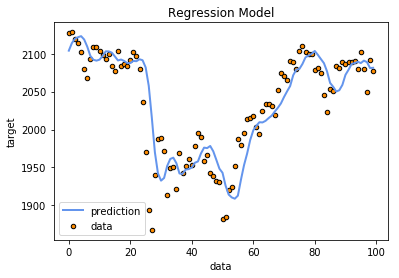

In [14]:
train_and_test(['close_avg_5'],False, True)

In [15]:
results = []

# Running the train_and_test function on each selected feature
for i in feat:
    value = train_and_test([i])
    results.append((i,value[0],value[1]))

# Sorting the results array by mean absolute error
sort_results = sorted(results, key=lambda val: val[2]) 
sort_results

[('close_avg_5', 22.20955487789375, 16.267533214533806),
 ('close_avg_365', 156.9671009256854, 146.72761998272236),
 ('vol_avg_365', 722.5343443585552, 687.0595232246919),
 ('vol_avg_5', 766.633412774203, 734.550548953909),
 ('close_std_365', 807.6974465991636, 762.7956662121369),
 ('close_std_5', 1080.8893547223126, 1006.0972368511858),
 ('vol_std_365', 1028.6681717825052, 1008.5857385373289),
 ('vol_std_5', 1108.773862387501, 1044.3372936889139),
 ('vol_std_ratio', 1460.5863661225053, 1447.448259973045),
 ('close_std_ratio', 1467.1162300218807, 1454.041573739578),
 ('vol_avg_ratio', 1468.0854036507933, 1455.7519596504),
 ('close_avg_ratio', 1471.207236592803, 1459.080164579285)]

We can see that on their own, the 5 day average of the closing price was the best at modelling the closing price for the day. However there is a large difference to the next nearest feature meaning that these features might not be at all useful at modelling. We will still use them with the 5 day average of the closing price to see if they improve the mean absolute error of the model. 

In [16]:
feat_index = []

for i in sort_results:
    feat_index.append(i[0])
    
feat_index

['close_avg_5',
 'close_avg_365',
 'vol_avg_365',
 'vol_avg_5',
 'close_std_365',
 'close_std_5',
 'vol_std_365',
 'vol_std_5',
 'vol_std_ratio',
 'close_std_ratio',
 'vol_avg_ratio',
 'close_avg_ratio']

In [24]:
for i in range(1,len(feat_index)-4):
    print(feat_index[:i+1])
    train_and_test(feat_index[:i+1],False)
    print("\n")

['close_avg_5', 'close_avg_365']
test mae: 16.12996327881152
test rmse: 22.1782861537376




['close_avg_5', 'close_avg_365', 'vol_avg_365']
test mae: 16.107653352914145
test rmse: 22.166357733225464




['close_avg_5', 'close_avg_365', 'vol_avg_365', 'vol_avg_5']
test mae: 16.1145331923632
test rmse: 22.200926846288947




['close_avg_5', 'close_avg_365', 'vol_avg_365', 'vol_avg_5', 'close_std_365']
test mae: 16.173449212348807
test rmse: 22.228735651818084




['close_avg_5', 'close_avg_365', 'vol_avg_365', 'vol_avg_5', 'close_std_365', 'close_std_5']
test mae: 16.142451741770522
test rmse: 22.181584611666214




['close_avg_5', 'close_avg_365', 'vol_avg_365', 'vol_avg_5', 'close_std_365', 'close_std_5', 'vol_std_365']
test mae: 16.002844684621564
test rmse: 22.141912699237317




['close_avg_5', 'close_avg_365', 'vol_avg_365', 'vol_avg_5', 'close_std_365', 'close_std_5', 'vol_std_365', 'vol_std_5']
test mae: 16.044756573364456
test rmse: 22.193229342254444






After sorting the features by the mean absolute error, we run a loop on the **feat_index** adding the next best feature column to the regression model. We can see that adding more features does not reduce the error of the model.